Paul, Steven, DSP Stock Project Report

Introduction

Purpose: The purpose of this project was to predict the outcome of stocks selected in order to win a internal class-based competition. In the process, we would learn about data science techniques and their applications, especially predictive models such as linear regression, in order to make predictions about the stock market. 

Explain what you hoped to achieve: We hoped to pick stocks that would make the most money in three week time period of the compeition (so fast growing stocks). We also hoped to learn more about how to use data science to predict stocks, learning concepts like SMA, multiple regression, and more.

Outline: The report begins with gathering and cleaning the data. The data was already well formatted, so most of the time is spent adding new columns such as a timestamp column and a couple SMA columns. After that, we then graphed the stock and their respective SMAs to get a better understanding of the previous movement of the data. We then developed a multi regression model taking into account date and both SMAs in order to predict the stock price. We then also developed a linear regression model taking into account only the date in order to predict the stock growth. 

In [ ]:
# issue with my kernel, so I had to install these packages through the "!" command in the notebook
!pip3 install pandas
!pip3 install numpy
!pip3 install matplotlib
!pip3 install seaborn
!pip3 install scikit-learn
!pip3 install statsmodels
!pip3 install yfinance
!pip3 install scipy


In [32]:
# imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
from datetime import datetime
import yfinance as yf
import scipy.stats as st
from mpl_toolkits.mplot3d import Axes3D

We decided to use data pulled from Yahoo finance of the last 2 months of each stock, with the focus the 'close' and 'date' columns. We used the date and the close columns to make two SMA (Simple Moving Average) columns (SMA 10 and SMA 20) because SMA is a good tool to predict stocks. We also made a timestamp column in order to be able to use the date column in our regression models, as it was a string previously. 

In [ ]:
# read in the csv files
dal_df = pd.read_csv('DAL.csv')
lrcx_df = pd.read_csv('LRCX.csv')
niu_df = pd.read_csv('NIU.csv')
unh_df = pd.read_csv('UNH.csv')
shel_df = pd.read_csv('SHEL.csv')

# convert the dates to datetime objects
for ind in dal_df.index:
    dal_df['Date'][ind] = datetime.strptime(dal_df['Date'][ind], '%Y-%m-%d')

for ind in lrcx_df.index:
    lrcx_df['Date'][ind] = datetime.strptime(lrcx_df['Date'][ind], '%Y-%m-%d')

for ind in niu_df.index:
    niu_df['Date'][ind] = datetime.strptime(niu_df['Date'][ind], '%Y-%m-%d')

for ind in unh_df.index:
    unh_df['Date'][ind] = datetime.strptime(unh_df['Date'][ind], '%Y-%m-%d')

for ind in shel_df.index:
    shel_df['Date'][ind] = datetime.strptime(shel_df['Date'][ind], '%Y-%m-%d')

# add simple moving averages to the dataframes
dal_df['SMA_20'] = dal_df['Close'].rolling(window=20).mean()
lrcx_df['SMA_20'] = lrcx_df['Close'].rolling(window=20).mean()
niu_df['SMA_20'] = niu_df['Close'].rolling(window=20).mean()
unh_df['SMA_20'] = unh_df['Close'].rolling(window=20).mean()
shel_df['SMA_20'] = shel_df['Close'].rolling(window=20).mean()

dal_df['SMA_10'] = dal_df['Close'].rolling(window=10).mean()
lrcx_df['SMA_10'] = lrcx_df['Close'].rolling(window=10).mean()
niu_df['SMA_10'] = niu_df['Close'].rolling(window=10).mean()
unh_df['SMA_10'] = unh_df['Close'].rolling(window=10).mean()
shel_df['SMA_10'] = shel_df['Close'].rolling(window=10).mean()

# add timestamp column
dal_df['Timestamp'] = 0
lrcx_df['Timestamp'] = 0
niu_df['Timestamp'] = 0
unh_df['Timestamp'] = 0
shel_df['Timestamp'] = 0

# convert the datetime objects to timestamps
for ind in dal_df.index:
    dal_df['Timestamp'][ind] = dal_df['Date'][ind].timestamp()

for ind in lrcx_df.index:
    lrcx_df['Timestamp'][ind] = lrcx_df['Date'][ind].timestamp()

for ind in niu_df.index:
    niu_df['Timestamp'][ind] = niu_df['Date'][ind].timestamp()

for ind in unh_df.index:
    unh_df['Timestamp'][ind] = unh_df['Date'][ind].timestamp()

for ind in shel_df.index:
    shel_df['Timestamp'][ind] = shel_df['Date'][ind].timestamp()

Below are graphs of the closing prices of the stocks, along with their 10 and 20 day moving averages. Also, the dataframe with the raw data is below. For DAL, all data is shown, and for the purpose of keeping the project file easier to read, the other stocks only show the first 5 rows of data. 

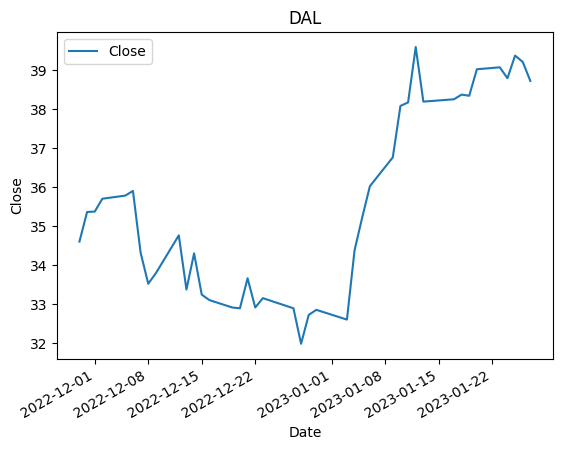

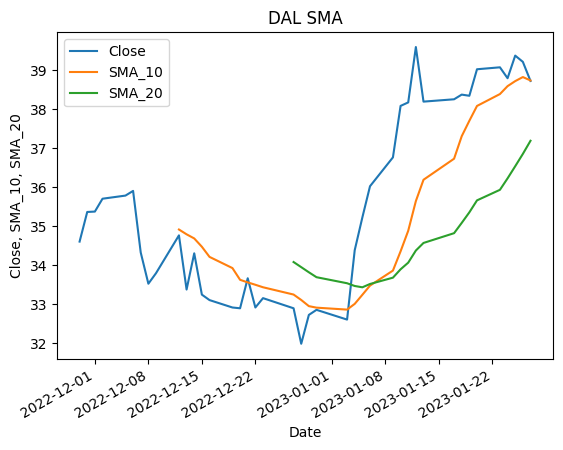

,Date,Open,High,Low,Close,Adj Close,Volume,SMA_20,SMA_10,Timestamp
0,2022-11-29 00:00:00,34.020000,34.730000,33.880001,34.610001,34.610001,6778200,NaN,NaN,1669698000
1,2022-11-30 00:00:00,34.509998,35.380001,34.209999,35.369999,35.369999,7404100,NaN,NaN,1669784400
2,2022-12-01 00:00:00,35.450001,35.740002,35.099998,35.380001,35.380001,6371600,NaN,NaN,1669870800
3,2022-12-02 00:00:00,35.000000,35.720001,34.880001,35.709999,35.709999,6566300,NaN,NaN,1669957200
4,2022-12-05 00:00:00,35.730000,36.880001,35.680000,35.790001,35.790001,12131800,NaN,NaN,1670216400
5,2022-12-06 00:00:00,35.900002,36.240002,35.200001,35.910000,35.910000,8832900,NaN,NaN,1670302800
6,2022-12-07 00:00:00,35.639999,35.650002,34.299999,34.330002,34.330002,10996500,NaN,NaN,1670389200
7,2022-12-08 00:00:00,34.570000,34.740002,33.299999,33.529999,33.529999,8918400,NaN,NaN,1670475600
8,2022-12-09 00:00:00,33.310001,33.820000,33.160000,33.799999,33.799999,5989400,NaN,NaN,1670562000
9,2022-12-12 00:00:00,33.689999,34.790001,33.599998,34.770000,34.770000,7163700,NaN,34.920000,1670821200


In [34]:
# DAL

# plot of the closing price of DAL vs date
dal_df.plot(x='Date', y='Close', title='DAL')

# add labels
plt.xlabel('Date')
plt.ylabel('Close')

plt.show()

# plot of the simple moving averages of DAL vs date
dal_df.plot(x='Date', y=['Close', 'SMA_10', 'SMA_20'], title='DAL SMA')

# add labels
plt.xlabel('Date')
plt.ylabel('Close, SMA_10, SMA_20')

plt.show()

# show the rows of dal
dal_df

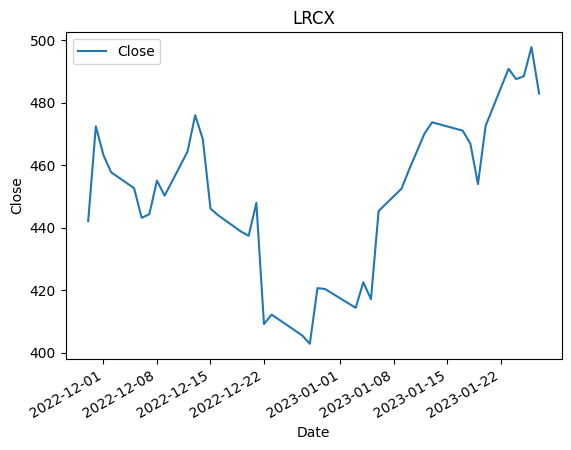

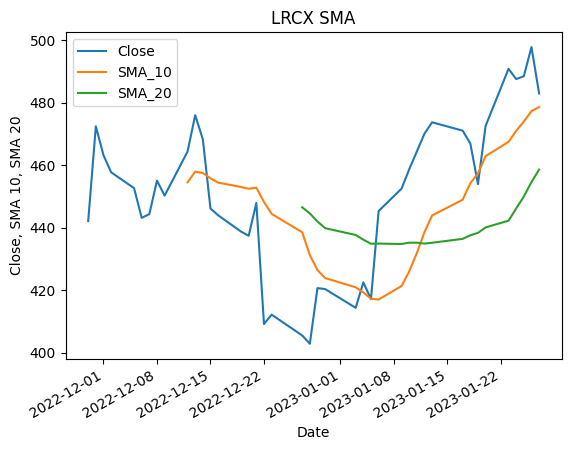

,Date,Open,High,Low,Close,Adj Close,Volume,SMA_20,SMA_10,Timestamp
0,2022-11-29 00:00:00,447.040009,450.299988,440.079987,442.049988,440.407654,903000,NaN,NaN,1669698000
1,2022-11-30 00:00:00,447.880005,472.390015,441.279999,472.380005,470.624969,2232800,NaN,NaN,1669784400
2,2022-12-01 00:00:00,479.320007,479.320007,456.739990,463.140015,461.419312,1377900,NaN,NaN,1669870800
3,2022-12-02 00:00:00,450.739990,460.230011,450.399994,457.670013,455.969635,1102200,NaN,NaN,1669957200
4,2022-12-05 00:00:00,455.739990,462.690002,448.630005,452.600006,450.918457,1088600,NaN,NaN,1670216400


In [35]:
# LRCX

# plot of the closing price of LRCX vs date
lrcx_df.plot(x='Date', y='Close', title='LRCX')

# add labels
plt.xlabel('Date')
plt.ylabel('Close')

plt.show()

# plot of the simple moving averages of LRCX vs date
lrcx_df.plot(x='Date', y=['Close', 'SMA_10', 'SMA_20'], title='LRCX SMA')

# add labels
plt.xlabel('Date')
plt.ylabel('Close, SMA 10, SMA 20')

plt.show()

# show the first 5 rows
lrcx_df.head()

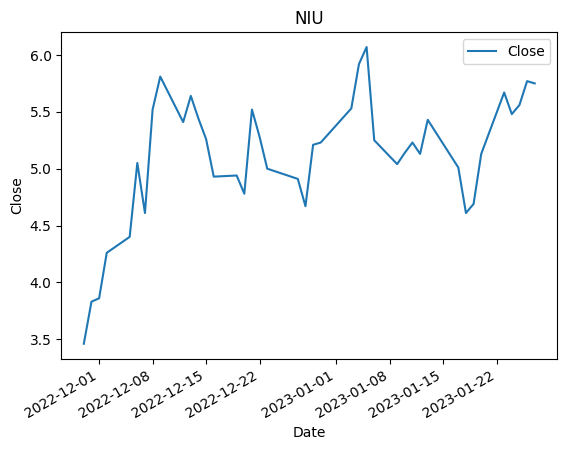

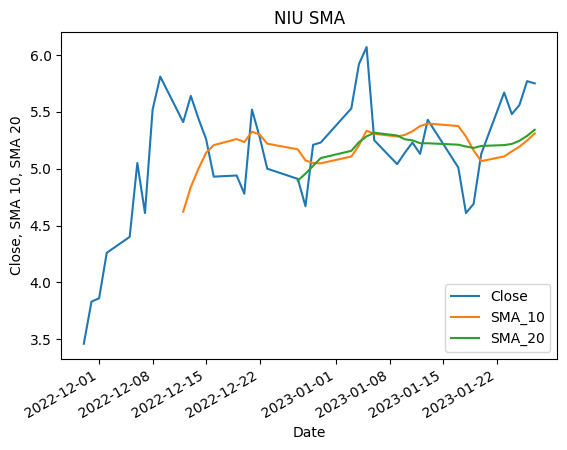

,Date,Open,High,Low,Close,Adj Close,Volume,SMA_20,SMA_10,Timestamp
0,2022-11-29 00:00:00,3.38,3.51,3.28,3.46,3.46,724200,NaN,NaN,1669698000
1,2022-11-30 00:00:00,3.60,4.06,3.59,3.83,3.83,2643800,NaN,NaN,1669784400
2,2022-12-01 00:00:00,3.82,3.93,3.70,3.86,3.86,636200,NaN,NaN,1669870800
3,2022-12-02 00:00:00,3.83,4.28,3.78,4.26,4.26,1138400,NaN,NaN,1669957200
4,2022-12-05 00:00:00,4.58,4.80,4.28,4.40,4.40,2630400,NaN,NaN,1670216400


In [36]:
# NIU

# plot of the closing price of NIU vs date
niu_df.plot(x='Date', y='Close', title='NIU')

# add labels
plt.xlabel('Date')
plt.ylabel('Close')

plt.show()

# plot of the simple moving averages of NIU vs date
niu_df.plot(x='Date', y=['Close','SMA_10', 'SMA_20'], title='NIU SMA')

# add labels
plt.xlabel('Date')
plt.ylabel('Close, SMA 10, SMA 20')

plt.show()

# show the first 5 rows
niu_df.head()

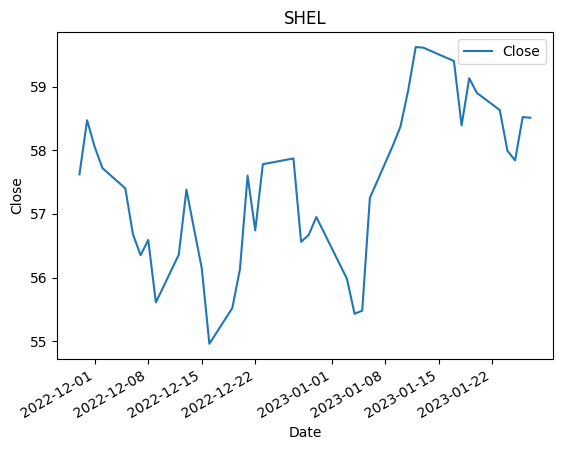

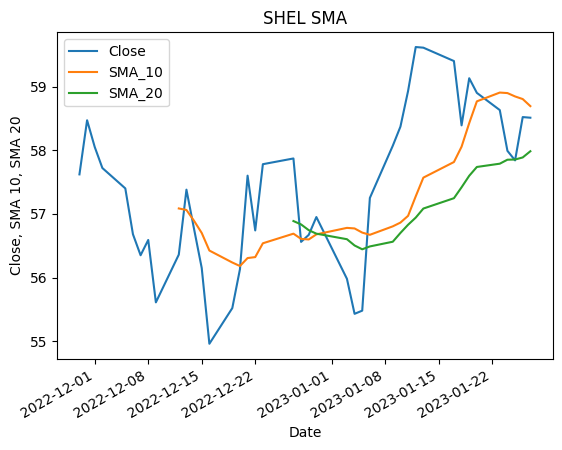

,Date,Open,High,Low,Close,Adj Close,Volume,SMA_20,SMA_10,Timestamp
0,2022-11-29 00:00:00,57.270000,58.029999,57.270000,57.619999,57.089558,4289617,NaN,NaN,1669698000
1,2022-11-30 00:00:00,58.470001,58.740002,57.856201,58.470001,57.931732,5377406,NaN,NaN,1669784400
2,2022-12-01 00:00:00,58.689999,58.770000,57.910000,58.049999,57.515598,4084642,NaN,NaN,1669870800
3,2022-12-02 00:00:00,57.720001,58.209999,57.485001,57.720001,57.188637,3510813,NaN,NaN,1669957200
4,2022-12-05 00:00:00,58.770000,58.970001,57.105000,57.400002,56.871586,5917006,NaN,NaN,1670216400


In [37]:
# SHEL 

# plot of the closing price of SHEL vs date
shel_df.plot(x='Date', y='Close', title='SHEL')

# add labels
plt.xlabel('Date')
plt.ylabel('Close')

plt.show()

# plot of the simple moving averages of SHEL vs date
shel_df.plot(x='Date', y=['Close', 'SMA_10', 'SMA_20'], title='SHEL SMA')

# add labels
plt.xlabel('Date')
plt.ylabel('Close, SMA 10, SMA 20')

plt.show()

# show the first 5 rows
shel_df.head()

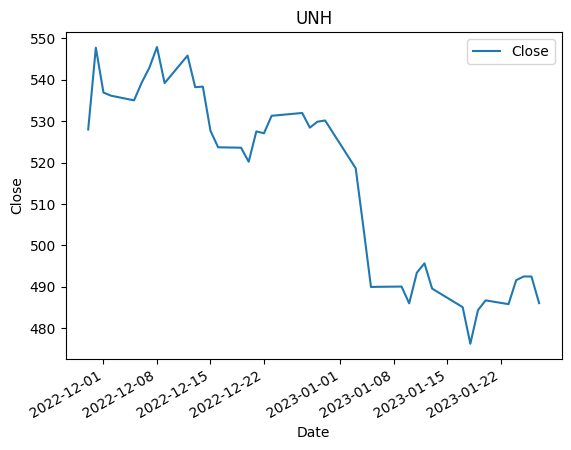

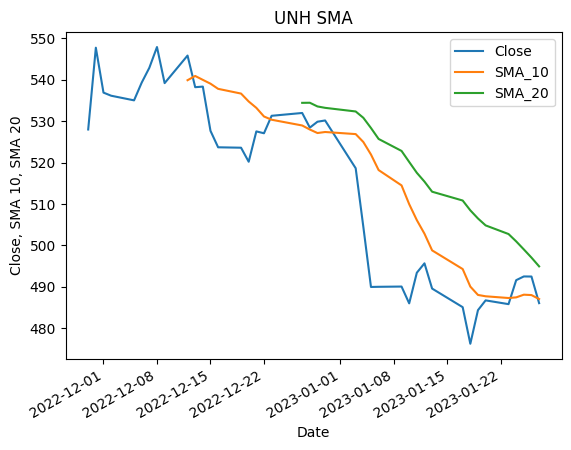

,Date,Open,High,Low,Close,Adj Close,Volume,SMA_20,SMA_10,Timestamp
0,2022-11-29 00:00:00,531.669983,532.969971,523.650024,528.000000,526.377380,3751000,NaN,NaN,1669698000
1,2022-11-30 00:00:00,529.719971,548.080017,527.479980,547.760010,546.076660,9688900,NaN,NaN,1669784400
2,2022-12-01 00:00:00,552.359985,553.000000,535.799988,536.909973,535.259949,2997800,NaN,NaN,1669870800
3,2022-12-02 00:00:00,532.830017,538.609985,532.440002,536.159973,536.159973,2346200,NaN,NaN,1669957200
4,2022-12-05 00:00:00,531.489990,540.380005,530.880005,535.039978,535.039978,2424800,NaN,NaN,1670216400


In [38]:
# UNH

# plot of the closing price of UNH vs date
unh_df.plot(x='Date', y='Close', title='UNH')

# add labels
plt.xlabel('Date')
plt.ylabel('Close')

plt.show()

# plot of the simple moving averages of UNH vs date
unh_df.plot(x='Date', y=['Close', 'SMA_10', 'SMA_20'], title='UNH SMA')

# add labels
plt.xlabel('Date')
plt.ylabel('Close, SMA 10, SMA 20')

plt.show()

# show the first 5 rows of UNH
unh_df.head()

We decided to use multiple regression as our model, because it could take into account both the date and the SMAs, and it would be able to predict the stock price. We also decided to use linear regression as our second model, because it could take into account only the date, and it would be able to predict the stock growth in a more simple visual way. 

We think that multiple linear regression is the most ideal, because it can take a variety of factors and make a prediction based on trends. However, it fails to take into account "events" such as the coronavirus situation or similar, which could have a large impact on the stock price not shown in the data.


                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     55.24
Date:                Mon, 20 Feb 2023   Prob (F-statistic):           2.80e-09
Time:                        22:46:25   Log-Likelihood:                -26.604
No. Observations:                  22   AIC:                             61.21
Df Residuals:                      18   BIC:                             65.57
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4731.6559   1446.228     -3.272      0.0

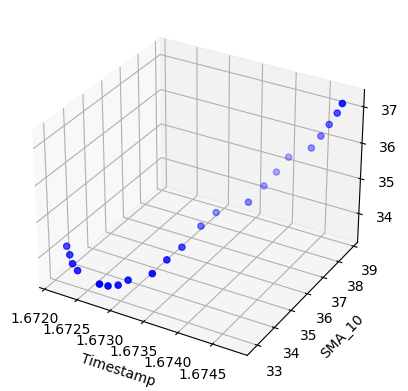

In [39]:
# DAL 

# model of the closing price of DAL vs date and simple moving averages
model = ols('Close ~ Timestamp + SMA_10 + SMA_20', data=dal_df).fit()
print(model.summary())

# 3d plot of the data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(dal_df['Timestamp'], dal_df['SMA_10'], dal_df['SMA_20'], c='b', marker='o')
ax.set_xlabel('Timestamp')
ax.set_ylabel('SMA_10')
ax.set_zlabel('SMA_20')

plt.show()

The R-square value is over .9 which suggests that this model is a good fit for the data, and so could be an accurate predictor of the stock price. The 3D graph here predicts the stock price going up, and so potentialy a good stock to buy.

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     48.83
Date:                Mon, 20 Feb 2023   Prob (F-statistic):           7.53e-09
Time:                        22:46:25   Log-Likelihood:                -81.375
No. Observations:                  22   AIC:                             170.8
Df Residuals:                      18   BIC:                             175.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -5.49e+04   1.13e+04     -4.845      0.0

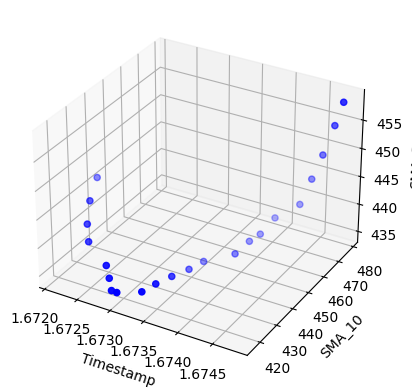

In [40]:
# LRCX

# model of the closing price of LRCX vs date and simple moving averages
model = ols('Close ~ Timestamp + SMA_10 + SMA_20', data=lrcx_df).fit()
print(model.summary())

# 3d plot of the data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(lrcx_df['Timestamp'], lrcx_df['SMA_10'], lrcx_df['SMA_20'], c='b', marker='o')
ax.set_xlabel('Timestamp')
ax.set_ylabel('SMA_10')
ax.set_zlabel('SMA_20')

plt.show()

The R-squared value is not as strong as the last stock, but still high. This model is also a good fit for the data, and so could be an accurate predictor of the stock price. The 3D graph here predicts the stock price going up as well, as the graph moves towards higher SMAs the larger the timestamp gets. This is a good stock to buy.

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     2.730
Date:                Mon, 20 Feb 2023   Prob (F-statistic):             0.0742
Time:                        22:46:25   Log-Likelihood:                -6.4174
No. Observations:                  22   AIC:                             20.83
Df Residuals:                      18   BIC:                             25.20
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    159.9243    196.116      0.815      0.4

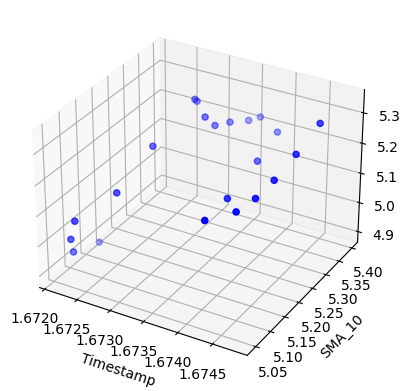

In [41]:
# NIU

# model of the closing price of NIU vs date and simple moving averages
model = ols('Close ~ Timestamp + SMA_10 + SMA_20', data=niu_df).fit()
print(model.summary())

# 3d plot of the data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(niu_df['Timestamp'], niu_df['SMA_10'], niu_df['SMA_20'], c='b', marker='o')
ax.set_xlabel('Timestamp')
ax.set_ylabel('SMA_10')
ax.set_zlabel('SMA_20')

plt.show()

There is weak correlation in this graph with an R-squared value of only around .3 and so this is not as good of a model. NIU is a volatile stock and we chose this stock more because of the events surrounding it (the ending of COVID restrictions in China) rather than for pure data science reasons. This is a stock to buy, but not backed up well by the data. There is no clear trend of growth leading up to the day of buying. 

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     4.713
Date:                Mon, 20 Feb 2023   Prob (F-statistic):             0.0134
Time:                        22:46:26   Log-Likelihood:                -29.554
No. Observations:                  22   AIC:                             67.11
Df Residuals:                      18   BIC:                             71.47
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2827.1288   1337.739     -2.113      0.0

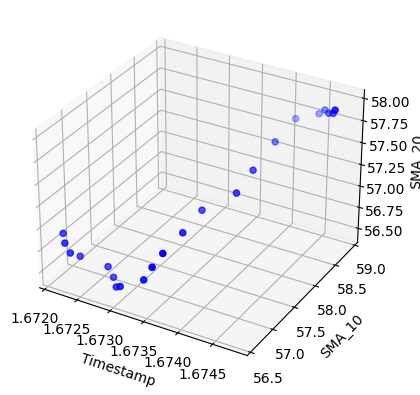

In [42]:
# SHEL

# model of the closing price of SHEL vs date and simple moving averages
model = ols('Close ~ Timestamp + SMA_10 + SMA_20', data=shel_df).fit()
print(model.summary())

# 3d plot of the data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(shel_df['Timestamp'], shel_df['SMA_10'], shel_df['SMA_20'], c='b', marker='o')

ax.set_xlabel('Timestamp')
ax.set_ylabel('SMA_10')
ax.set_zlabel('SMA_20')

plt.show()

SHEL has a correlation of only .4 which is weak, but considering the trajector of the graph, it seems as though that the SMAs are rising, suggesting that this might be a good stock to buy. Not as strong as the first two, and not as weak as the last one, this is a stock to buy, but not backed up well by the data.

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     19.94
Date:                Mon, 20 Feb 2023   Prob (F-statistic):           5.94e-06
Time:                        22:46:26   Log-Likelihood:                -77.485
No. Observations:                  22   AIC:                             163.0
Df Residuals:                      18   BIC:                             167.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9.643e+04   2.82e+04      3.415      0.0

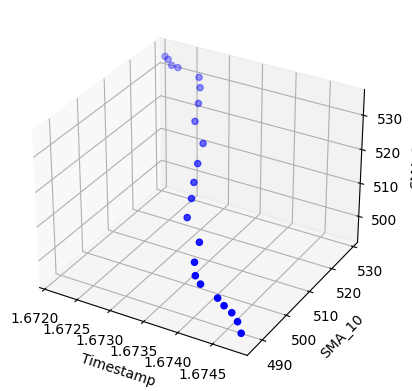

In [43]:
# UNH

# model of the closing price of UNH vs date and simple moving averages
model = ols('Close ~ Timestamp + SMA_10 + SMA_20', data=unh_df).fit()
print(model.summary())

# 3d plot of the data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(unh_df['Timestamp'], unh_df['SMA_10'], unh_df['SMA_20'], c='b', marker='o')
ax.set_xlabel('Timestamp')
ax.set_ylabel('SMA_10')
ax.set_zlabel('SMA_20')

plt.show()

This graph has a decently strong R^2 of .75 and so this is a good model. The graph shows that the stock price is constant which means that this stock would be a good hold, and would therefore not be a risky buy.

We then used a simple linear regression to more clearly predict the growth of the stock simply blased on the close and the timestamp.

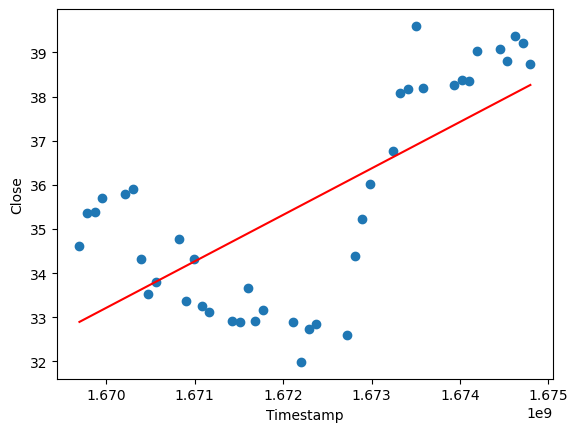

In [44]:
# DAL 

# linear regression model of the closing price of DAL vs date
dal_result = st.linregress(dal_df['Timestamp'], dal_df['Close'])

plt.plot(dal_df['Timestamp'], dal_df['Timestamp']*dal_result.slope + dal_result.intercept, 'r')
plt.scatter(dal_df['Timestamp'], dal_df['Close'])

plt.xlabel('Timestamp')
plt.ylabel('Close')

plt.show()


DAL shows upward growth, and so this is a good stock to buy.

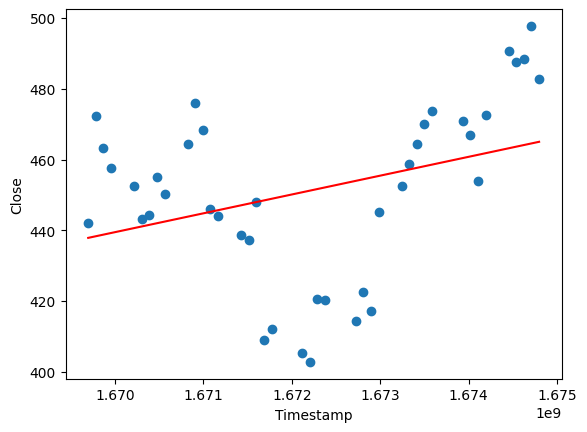

In [45]:
# LRCX

# linear regression model of the closing price of LRCX vs date
lrcx_result = st.linregress(lrcx_df['Timestamp'], lrcx_df['Close'])

plt.plot(lrcx_df['Timestamp'], lrcx_df['Timestamp']*lrcx_result.slope + lrcx_result.intercept, 'r')
plt.scatter(lrcx_df['Timestamp'], lrcx_df['Close'])

plt.xlabel('Timestamp')
plt.ylabel('Close')

plt.show()

LRCX shows upward growth, and so this is a good stock to buy, however, the growth is not as strong as the first stock.

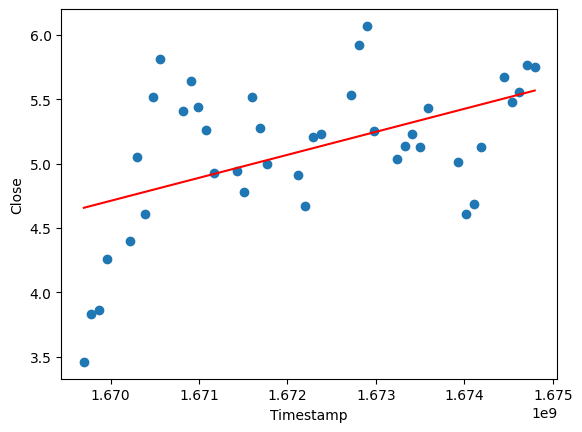

In [46]:
# NIU

# linear regression model of the closing price of NIU vs date
niu_result = st.linregress(niu_df['Timestamp'], niu_df['Close'])

plt.plot(niu_df['Timestamp'], niu_df['Timestamp']*niu_result.slope + niu_result.intercept, 'r')
plt.scatter(niu_df['Timestamp'], niu_df['Close'])

plt.xlabel('Timestamp')
plt.ylabel('Close')

plt.show()

There is a positive upward trend in this graph, and so this is a good stock to buy. However, the stock seems extremely volatile, and so this is a risky buy. 

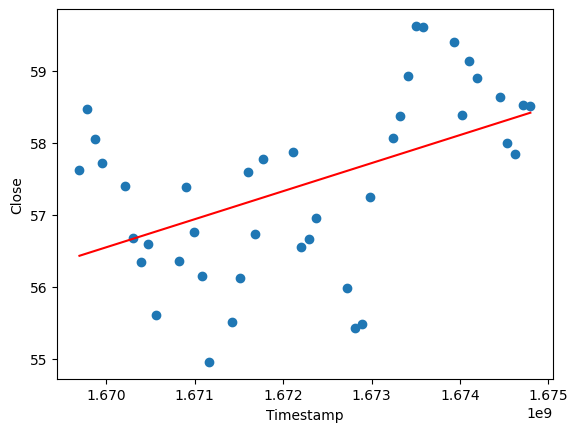

In [47]:
# SHEL

# linear regression model of the closing price of SHEL vs date
shel_result = st.linregress(shel_df['Timestamp'], shel_df['Close'])

plt.plot(shel_df['Timestamp'], shel_df['Timestamp']*shel_result.slope + shel_result.intercept, 'r')
plt.scatter(shel_df['Timestamp'], shel_df['Close'])

plt.xlabel('Timestamp')
plt.ylabel('Close')

plt.show()

While this stock also seems volatile, it has a positive upward trend, and so this is a good stock to buy. However, the growth is not as strong as the first two stocks, and so this is a risky buy.

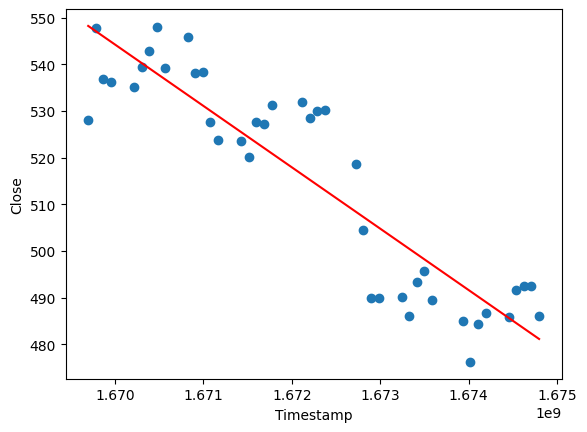

In [48]:
# UNH

# linear regression model of the closing price of UNH vs date
unh_result = st.linregress(unh_df['Timestamp'], unh_df['Close'])

plt.plot(unh_df['Timestamp'], unh_df['Timestamp']*unh_result.slope + unh_result.intercept, 'r')
plt.scatter(unh_df['Timestamp'], unh_df['Close'])

plt.xlabel('Timestamp')
plt.ylabel('Close')

plt.show()

This stock seems to be clearly going down, and so this was not the ideal stock to buy. We chose this more for our "event" reasons rather then for reasons backed up purely for the data. We expect an unforseen spike in the stock price, but this is not backed up by the data.

Portfolio Overview

LRCX
Sector: Technology/Semiconductor Equipment & Materials
Price bought at: 478.56 USD
Price sold: 495.66 USD
Description: Lam Research Corporation is an American company that manufactures semiconductor processing equipment. 

UNH
Sector: Healthcare/Healthcare Plans
Price bought at: 491.91 USD
Price sold: 499.08 USD
Description: UnitedHealth Group Incorporated is an American healthcare company. They operate health insurance plans and give health care coverage to public sector employees, corporate employees, and individuals. 

DAL
Sector: Industrials/Airlines
Price bought at: 38.75 USD
Price sold: 38.36 USD
Description: Delta Air Lines is a major American commercial airline. They operate domestic and international flights. Delta is one of the world’s biggest airlines. 


SHEL
Sector: Energy/Oil & Gas Integrated
Price bought at: 58.72 USD
Price sold: 60.66 USD
Description: Shell plc (public limited company) is a British oil and gas company. They are active in every area of the oil and gas industry. 

NIU
Sector: Consumer Cyclical/Auto Manufacturers
Price bought at: 5.45 USD
Price sold: 4.68 USD
Description: Niu Technologies is a Chinese electric scooter company. They manufacture various electric vehicles, including electric scooters, electric bicycles, and electric motorcycles. They are one of the largest electric vehicle manufacturers in China. 

Decision Making

We chose to evenly allocate our money to a diversified portfolio of many big industries. As it has been a volatile time for stocks recently, we decided to invest our capital into promising and relatively stable industries. 

We invested in LRCX because we thought that the semiconductor industry was promising. President Joe Biden has recently signed the CHIPS Act into law, providing numerous subsidies to semiconductor companies. In our opinion, this injection of capital should have caused the stocks to rise. In addition, semiconductors have been in high demand for quite a while now. LRCX also shows promising signs of growth in our models.

We invested in UNH because we wanted some stable growth. Health care is essential, especially in the United States, therefore, health care should provide some returns, even in a bear market. In our research, healthcare stocks have long been seen as “defensive” and “recession-resistant” stocks. As UNH is one of the largest for-profit healthcare companies, we believed it was wise to invest in UNH during these times of economic uncertainty. UNH showed mild signs of growth in our data science models, and therefore is backed up by the results of this project somewhat. 

We invested in DAL because we believed that as the pandemic wound down, travel would increase. Since travel would increase, more people would travel via air. We thought that now would be a great time to buy as we believed that the airline stocks will recover from the pandemic soon. Therefore, we bought Delta Air Lines, one of the biggest airlines in the United States and the world. DAL also shows a promising future in our data science models, and therefore is backed up by the results of this project. 

We invested in SHEL because energy stocks do relatively okay during bull markets. No matter what, people still need energy, which means energy stocks don’t get hit the hardest during an economic downturn. In addition, as Russia is sanctioned by the West, this means that there are fewer barrels, and thus less competition, in the oil market. We invested in Shell plc as it is one of the biggest multinational Western oil companies. SHEL does not show promising growth in our data science models, but we believe that the events surrounding the company will cause the stock price to rise.

We decided to take a gamble with NIU. As China opens up its economy after months of lockdown and quarantines, more people are out and about. This means that more people will have to move from Point A to Point B. Given these circumstances, we thought that more people would buy e-scooters, e-bikes, and e-motorcycles. Therefore, we invested in NIU as it is one of China’s biggest electric vehicle companies. NIU does not show promising growth in our data science models, but we believe that the events surrounding the company will cause the stock price to rise.

We stayed confident in our stocks, and made no buys/sells during they duration of the project, and so we were able to see the results of our investments directly. 

Conclusion

The stock project was significantly different then the NFL project because of the nature of the prediction we were able to make. Rather then prediciting which team we believed would win, we instead looked at the growth of stocks and how they would move in the future. This was a very interesting project because it allowed us to see how the stock market works, and how we can use data science to predict the future of stocks. There was also a lot of learning about stocks, and data related to stocks, as opposed to NFL statistics. Also we used different models to predict the future of stocks then the NFL project because of the nature of the difference in the style of the data. 

We learned a lot about how stocks work, and different stock related statsitics such as volume and simple moving averages. We also learned about the different industires the stocks are in order to predict major events that might affect the stock price. We also learned about the different models we can use to predict the future of stocks, and how to use them. For example, we used multiple regression, linear regressions, and worked with R^2 values. These are all things that we did not learn in the NFL project, and so this project was a great learning experience for us. 

If we had more time, we would have probably implemented some kind of machine learning model, which could take into account major stock-shifting events like quarterly earnings reports. It could also have taken into account a wider range of input data that could have given a more accurate prediction. We would have also liked to predict actually monetary values, rather then just the direction of the stock in terms of where we predict the stock will go. 